In [8]:
import os
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from gqn_dataset import GQNDataset, Scene, transform_viewpoint, sample_batch, GQNDataset_pdisco, trees_rearrange, bbox_rearrange
import numpy as np

import utils_disco

In [9]:
train_data_dir = "/home/mprabhud/dataset/clevr_veggies/npys/be_lt.txt"
#train_data_dir = "/projects/katefgroup/datasets/clevr_vqa/raw/npys/multi_obj_480_a"

In [10]:
train_dataset = GQNDataset_pdisco(root_dir=train_data_dir, target_transform=transform_viewpoint, dataset="Clevr")

In [11]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

In [12]:
for b in train_loader:
    x_data, v_data, metadata = b
    break

KeyError: 'bbox_origin'

In [13]:
import pickle
scene_path = train_dataset.all_files[0]
data = pickle.load(open(scene_path, "rb"))

In [14]:
tree_seq_filename = data['tree_seq_filename']
tree_filenames = ["/home/mprabhud/dataset/clevr_veggies/" + tree_seq_filename]           
trees = [pickle.load(open(i,"rb")) for i in tree_filenames]
gt_boxesR,scores,classes = trees_rearrange(trees)

NameError: name 'hyp' is not defined

In [18]:
all_bboxes =[]

for tree in trees:
    tree,boxes,_,all_classes = bbox_rearrange(tree,boxes=[],classes={},all_classes=[])
    all_bboxes.append(boxes)

In [19]:
all_bboxes = np.stack(all_bboxes)

In [20]:
all_bboxes.shape

(1, 3, 6)

In [8]:
x, v, x_q, v_q, context_idx, query_idx = sample_batch(x_data, v_data, "Clevr")

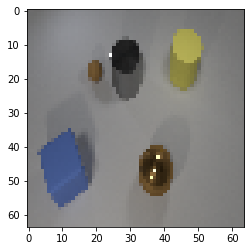

In [9]:
plt.imshow(x[1][0])

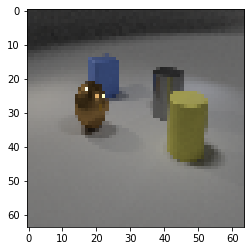

In [10]:
plt.imshow(x_q[1])

In [11]:
from attrdict import AttrDict

args = AttrDict({'N':10,'batch_size':16})

__p = lambda x: utils_disco.pack_seqdim(x, args.batch_size)
__u = lambda x: utils_disco.unpack_seqdim(x, args.batch_size)

In [12]:
x = x.permute(0,1,4,2,3)
x_q = x_q.permute(0,3,1,2)

In [13]:
args

AttrDict({'N': 10, 'batch_size': 16})

In [16]:
x_data_, v_data_, label_list = utils_disco.get_cropped_rgb(x, v, metadata, args, __p, __u, context_idx[0])

/home/mprabhud/saksham/torch-gqn/utils_disco.py:97: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xmin,ymin,zmin,xmax,ymax,zmax = torch.unbind(torch.tensor(aligned_boxes), dim=-1)


In [17]:
x_q_data_, v_q_data_, label_list_q = utils_disco.get_cropped_rgb(x_q.unsqueeze(1), v_q.unsqueeze(1), metadata, args, __p, __u, query_idx)

/home/mprabhud/saksham/torch-gqn/utils_disco.py:97: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xmin,ymin,zmin,xmax,ymax,zmax = torch.unbind(torch.tensor(aligned_boxes), dim=-1)


In [18]:
x_data_.shape,x_q_data_.shape

(torch.Size([109, 1, 3, 64, 64]), torch.Size([109, 1, 3, 64, 64]))

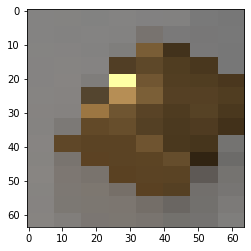

In [25]:
plt.imshow(x_data_[92][0].permute(1,2,0))

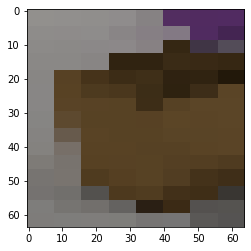

In [26]:
plt.imshow(x_q_data_[92][0].permute(1,2,0))